In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel(r"C:\Users\kiran\OneDrive\Desktop\data analyst\Adidas Sales Analysis\Adidas US Sales Datasets.xlsx")

In [3]:
data.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [5]:
data.describe()

,Retailer ID,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9.648000e+03,9648,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,2021-05-10 15:20:44.776119296,45.216625,256.930037,93273.437500,34425.244761,0.422991
min,1.128299e+06,2020-01-01 00:00:00,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,2021-02-17 00:00:00,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,1.185732e+06,2021-06-04 00:00:00,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,1.185732e+06,2021-09-16 00:00:00,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,1.197831e+06,2021-12-31 00:00:00,110.000000,1275.000000,825000.000000,390000.000000,0.800000
std,2.636038e+04,NaN,14.705397,214.252030,141916.016727,54193.113713,0.097197


In [6]:
data.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [8]:
data.duplicated().sum()

np.int64(0)

In [9]:
data.dtypes

Retailer                    object
Retailer ID                  int64
Invoice Date        datetime64[ns]
Region                      object
State                       object
City                        object
Product                     object
Price per Unit             float64
Units Sold                   int64
Total Sales                float64
Operating Profit           float64
Operating Margin           float64
Sales Method                object
dtype: object

In [58]:
data['Year'] = data['Invoice Date'].dt.year
data['Month'] = data['Invoice Date'].dt.month
data['Quarter'] = data['Invoice Date'].dt.to_period('Q')

In [18]:
unique_retailers = data['Retailer'].nunique()
unique_products = data['Product'].nunique()

print(f"Unique Retailers: {unique_retailers}")
print(f"Unique Products: {unique_products}")


Unique Retailers: 6
Unique Products: 6


In [19]:

product_sales = data.groupby('Product')['Units Sold'].sum()

most_sold_product = product_sales.idxmax()
least_sold_product = product_sales.idxmin()

print(f"Most Sold Product: {most_sold_product} ({product_sales.max()} units)")
print(f"Least Sold Product: {least_sold_product} ({product_sales.min()} units)")


Most Sold Product: Men's Street Footwear (593320 units)
Least Sold Product: Men's Apparel (306683 units)


In [25]:
retailers_sales = data.groupby('Retailer')['Total Sales'].sum()

best_performing_retailer = retailers_sales.idxmax()
least_performing_retailer = retailers_sales.idxmin()

print(f"Best Performing Retailer: {best_performing_retailer} (${retailers_sales.max():,.2f})")
print(f"Least Performing Retailer: {least_performing_retailer} (${retailers_sales.min():,.2f})")



Best Performing Retailer: West Gear ($242,964,333.00)
Least Performing Retailer: Walmart ($74,558,410.00)


In [30]:
sales_by_region = data.groupby('Region')['Total Sales'].sum().reset_index()
print(sales_by_region)

      Region  Total Sales
0    Midwest  135800459.0
1  Northeast  186324067.0
2      South  144663181.0
3  Southeast  163171236.0
4       West  269943182.0


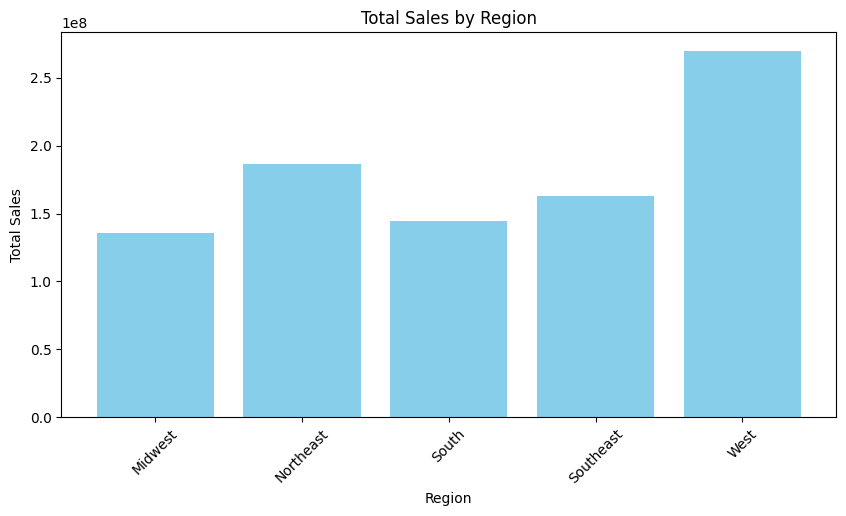

In [34]:
plt.figure(figsize=(10, 5))
plt.bar(sales_by_region['Region'], sales_by_region['Total Sales'], color='skyblue')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region')
plt.xticks(rotation=45)
plt.show()


In [31]:
sales_by_state = data.groupby('State')['Total Sales'].sum().reset_index()
print(sales_by_state)


             State  Total Sales
0          Alabama   17633424.0
1           Alaska   14753103.0
2          Arizona   15782221.0
3         Arkansas   12639347.0
4       California   60174133.0
5         Colorado   20996536.0
6      Connecticut   11573448.0
7         Delaware   12298412.0
8          Florida   59283714.0
9          Georgia   18997466.0
10          Hawaii   22282457.0
11           Idaho   19276878.0
12        Illinois    9797488.0
13         Indiana    8836198.0
14            Iowa    7424011.0
15          Kansas    9972864.0
16        Kentucky   10072848.0
17       Louisiana   23750781.0
18           Maine    9195978.0
19        Maryland    7758059.0
20   Massachusetts   11076810.0
21        Michigan   18625433.0
22       Minnesota    7378068.0
23     Mississippi   15591709.0
24        Missouri    9683265.0
25         Montana   15710886.0
26        Nebraska    5929038.0
27          Nevada   20858509.0
28   New Hampshire   16411667.0
29      New Jersey    9934246.0
30      

In [32]:
sales_by_city = data.groupby('City')['Total Sales'].sum().reset_index()
print(sales_by_city)


              City  Total Sales
0           Albany   24427804.0
1      Albuquerque   19865016.0
2        Anchorage   14753103.0
3          Atlanta   18997466.0
4        Baltimore    7758059.0
5         Billings   15710886.0
6       Birmingham   17633424.0
7            Boise   19276878.0
8           Boston   11076810.0
9       Burlington   14352923.0
10      Charleston   39974797.0
11       Charlotte   23956531.0
12        Cheyenne   18577517.0
13         Chicago    9797488.0
14        Columbus   18484583.0
15          Dallas   20902864.0
16          Denver   20996536.0
17      Des Moines    7424011.0
18         Detroit   18625433.0
19           Fargo    7735580.0
20        Hartford   11573448.0
21        Honolulu   22282457.0
22         Houston   25456882.0
23    Indianapolis    8836198.0
24         Jackson   15591709.0
25       Knoxville   18067440.0
26       Las Vegas   20858509.0
27     Little Rock   12639347.0
28     Los Angeles   25634913.0
29      Louisville   10072848.0
30      

In [47]:
sales_by_region = data.groupby('Region')['Total Sales'].sum()

best_performing_region = sales_by_region.idxmax()
least_performing_region = sales_by_region.idxmin()

print(f"Best Performing Region: {best_performing_region} (${sales_by_region.max():,.2f})")
print(f"Least Performing Region: {least_performing_region} (${sales_by_region.min():,.2f})")



Best Performing Region: West ($269,943,182.00)
Least Performing Region: Midwest ($135,800,459.00)


In [49]:
sales_by_state= data.groupby('State')['Total Sales'].sum()

best_performing_state = sales_by_state.idxmax()
least_performing_state = sales_by_state.idxmin()

print(f"Best Performing state: {best_performing_state} (${sales_by_state.max():,.2f})")
print(f"Least Performing state: {least_performing_state} (${sales_by_state.min():,.2f})")

Best Performing state: New York ($64,229,039.00)
Least Performing state: Nebraska ($5,929,038.00)


In [50]:
sales_by_city= data.groupby('City')['Total Sales'].sum()

best_performing_city = sales_by_city.idxmax()
least_performing_city = sales_by_city.idxmin()

print(f"Best Performing city: {best_performing_city} (${sales_by_city.max():,.2f})")
print(f"Least Performing city: {least_performing_city} (${sales_by_city.min():,.2f})")

Best Performing city: Charleston ($39,974,797.00)
Least Performing city: Omaha ($5,929,038.00)


Text(0.5, 1.0, 'Yearly Sales Trend')

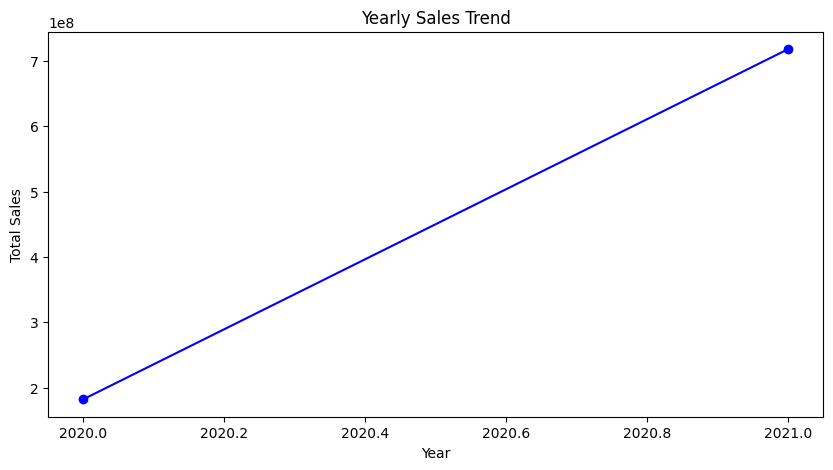

In [65]:
yearly_sales = data.groupby('Year')['Total Sales'].sum().reset_index()
plt.figure(figsize=(10, 5))
plt.plot(yearly_sales['Year'], yearly_sales['Total Sales'], marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Yearly Sales Trend')

Text(0.5, 1.0, 'Quarterly Sales Trend')

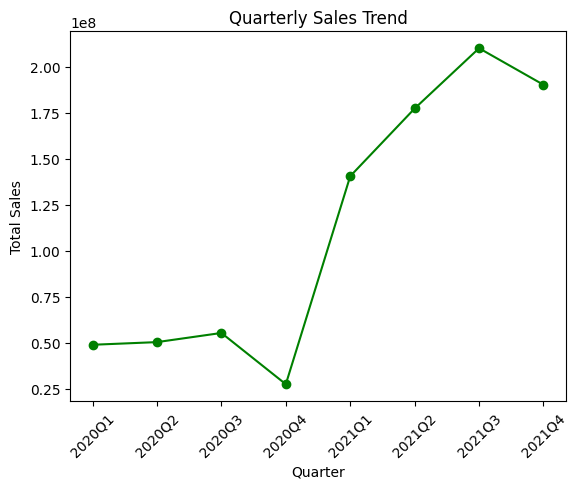

In [67]:
quarterly_sales = data.groupby('Quarter')['Total Sales'].sum().reset_index()
plt.plot(quarterly_sales['Quarter'].astype(str), quarterly_sales['Total Sales'], marker='o', linestyle='-', color='g')
plt.xlabel('Quarter')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.title('Quarterly Sales Trend')

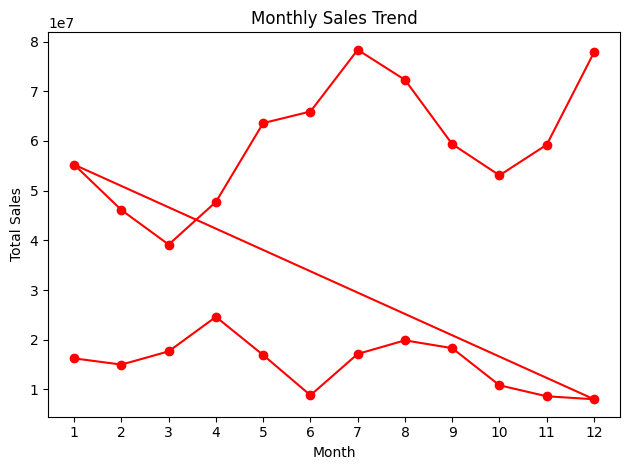

In [69]:
monthly_sales = data.groupby(['Year', 'Month'])['Total Sales'].sum().reset_index()
plt.plot(monthly_sales['Month'].astype(str), monthly_sales['Total Sales'], marker='o', linestyle='-', color='r')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend')
plt.tight_layout()
plt.show()

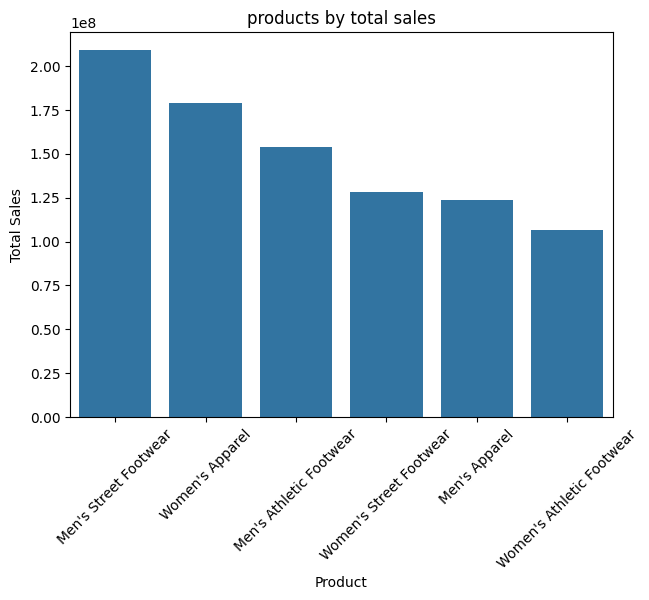

In [79]:
best_selling_products_by_total_sales=data.groupby('Product')['Total Sales'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(7,5))
sns.barplot(x='Product',y='Total Sales',data= best_selling_products_by_total_sales)
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.title('products by total sales')
plt.xticks(rotation=45)
plt.show()


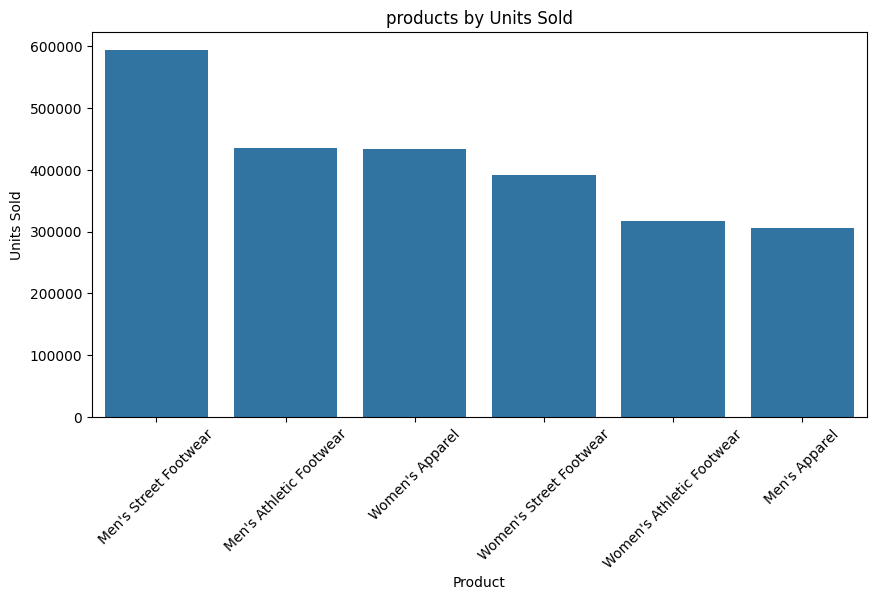

In [82]:
best_selling_products_by_units_sold=data.groupby('Product')['Units Sold'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x='Product',y='Units Sold',data= best_selling_products_by_units_sold)
plt.xlabel('Product')
plt.ylabel('Units Sold')
plt.title('products by Units Sold')
plt.xticks(rotation=45)
plt.show()


In [86]:
product_margin = data.groupby('Product')['Operating Margin'].mean().reset_index()


highest_margin_product = product_margin.loc[product_margin['Operating Margin'].idxmax()]
lowest_margin_product = product_margin.loc[product_margin['Operating Margin'].idxmin()]


print(f" Product with Highest Operating Margin: {highest_margin_product['Product']} ({highest_margin_product['Operating Margin']:.2f}%)")
print(f" Product with Lowest Operating Margin: {lowest_margin_product['Product']} ({lowest_margin_product['Operating Margin']:.2f}%)")


 Product with Highest Operating Margin: Men's Street Footwear (0.45%)
 Product with Lowest Operating Margin: Men's Athletic Footwear (0.40%)


In [102]:
total_sales_by_Sales_shipMethod=data.groupby('Sales Method')['Total Sales'].sum()
print(total_sales_by_Sales_shipMethod)

Sales Method
In-store    356643750.0
Online      247672882.0
Outlet      295585493.0
Name: Total Sales, dtype: float64


In [104]:
total_profit_by_shipMethod=data.groupby('Sales Method')['Operating Profit'].sum()
print(total_profit_by_shipMethod)

Sales Method
In-store    1.275913e+08
Online      9.655518e+07
Outlet      1.079883e+08
Name: Operating Profit, dtype: float64


In [105]:
data['Sales Method'].value_counts()

Sales Method
Online      4889
Outlet      3019
In-store    1740
Name: count, dtype: int64

 Best time to sell Men's Apparel is July (Sales: $13121046.00)
 Best time to sell Men's Athletic Footwear is August (Sales: $18176377.00)
 Best time to sell Men's Street Footwear is July (Sales: $23084753.00)
 Best time to sell Women's Apparel is July (Sales: $19524825.00)
 Best time to sell Women's Athletic Footwear is August (Sales: $10826677.00)
 Best time to sell Women's Street Footwear is August (Sales: $13556630.00)


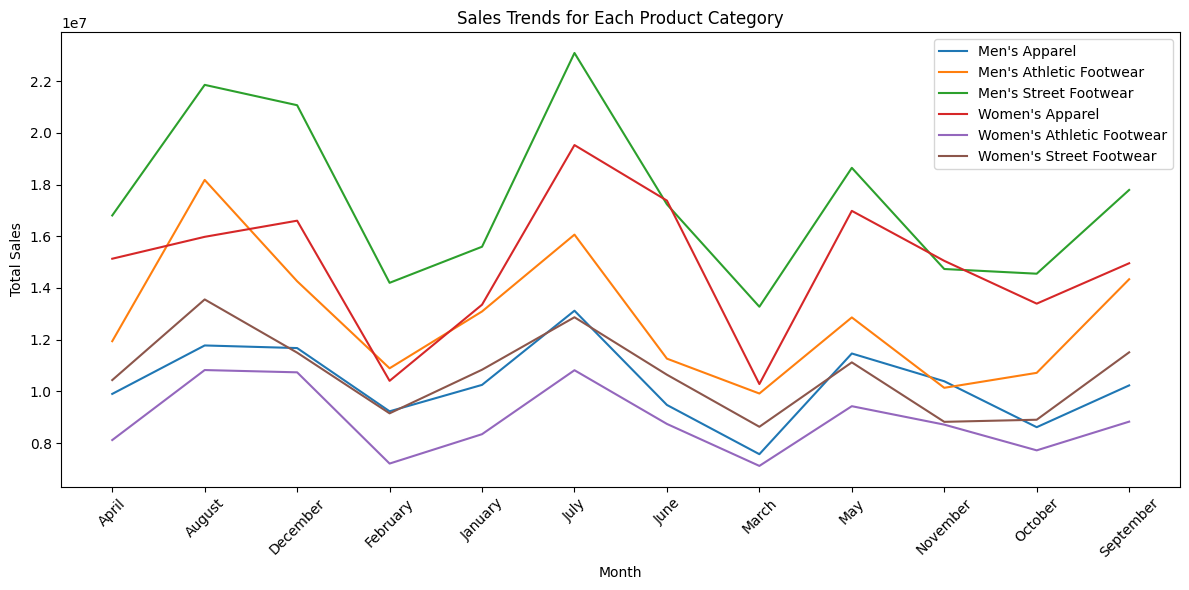

In [107]:
data['Month'] = data['Invoice Date'].dt.month_name()
category_sales = data.groupby(['Product', 'Month'])['Total Sales'].sum().reset_index()


best_sales_months = category_sales.loc[category_sales.groupby('Product')['Total Sales'].idxmax()]
for index, row in best_sales_months.iterrows():
    print(f" Best time to sell {row['Product']} is {row['Month']} (Sales: ${row['Total Sales']:.2f})")


plt.figure(figsize=(12, 6))
for product in category_sales['Product'].unique():
    product_data = category_sales[category_sales['Product'] == product]
    plt.plot(product_data['Month'], product_data['Total Sales'], label=product)

plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Sales Trends for Each Product Category')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


                  Units Sold  Total Sales  Operating Profit
Units Sold          1.000000     0.913431          0.892379
Total Sales         0.913431     1.000000          0.956307
Operating Profit    0.892379     0.956307          1.000000


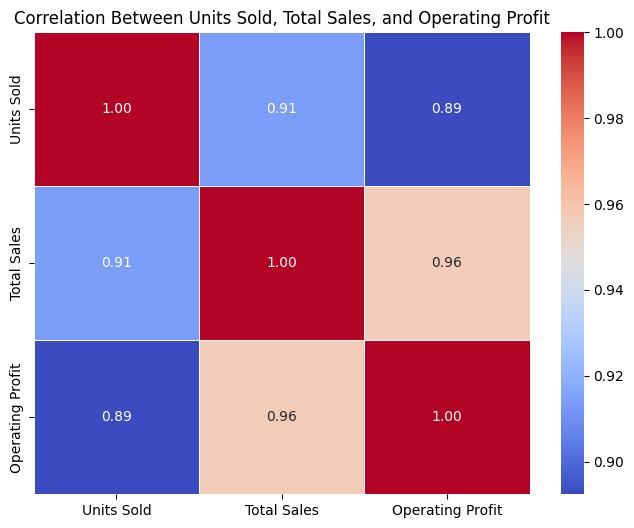

In [108]:
correlation_data = data[['Units Sold', 'Total Sales', 'Operating Profit']]

correlation_matrix = correlation_data.corr()


print(correlation_matrix)


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Units Sold, Total Sales, and Operating Profit')
plt.show()